In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_approval_dataset.csv to loan_approval_dataset.csv


In [ ]:
import pandas as pd
df = pd.read_csv('loan_approval_dataset.csv')

# Data Cleaning & Preparation

In [ ]:
print(df.columns)
print(df.shape)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')
(4269, 13)


In [ ]:
df = df.drop('loan_id', axis = 1)

In [ ]:
print(df.head())
print(df.info())

   no_of_dependents      education self_employed  income_annum  loan_amount  \
0                 2       Graduate            No       9600000     29900000   
1                 0   Not Graduate           Yes       4100000     12200000   
2                 3       Graduate            No       9100000     29700000   
3                 3       Graduate            No       8200000     30700000   
4                 5   Not Graduate           Yes       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value loa

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64
luxury_assets_value,int64


In [ ]:
df.columns = df.columns.str.strip()
print(df['self_employed'].unique())
print(df['education'].unique())
print(df['loan_status'].unique())

[' No' ' Yes']
[' Graduate' ' Not Graduate']
[' Approved' ' Rejected']


In [ ]:
education_mapping = {' Graduate': 1, ' Not Graduate': 0}
self_employed_mapping = {' Yes': 1, ' No': 0}
loan_status_mapping = {' Approved': 1, ' Rejected': 0}

df['education'] = df['education'].map(education_mapping).fillna(-1)
df['self_employed'] = df['self_employed'].map(self_employed_mapping).fillna(-1)
df['loan_status'] = df['loan_status'].map(loan_status_mapping).fillna(-1)

df['education'] = df['education'].astype(int)
df['self_employed'] = df['self_employed'].astype(int)
df['loan_status'] = df['loan_status'].astype(int)

In [ ]:
df.dtypes

,0
no_of_dependents,int64
education,int64
self_employed,int64
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64
luxury_assets_value,int64


In [ ]:
ext_cols = []

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outliers.sum()

outlier_counts = outliers.sum()

for col, count in outlier_counts.items():
    if count > 0:
        ext_cols.append(col)

print("Columns with outliers:", ext_cols)

Columns with outliers: ['residential_assets_value', 'commercial_assets_value', 'bank_asset_value']


In [ ]:
import numpy as np

for col in ext_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  df[col] = np.where(df[col] < lower, lower,
                               np.where(df[col] > upper, upper, df[col]))

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outliers.sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


# Exploratory Data Analysis

In [ ]:
df.describe()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,2.498712,0.502225,0.503631,5.059124e+06,1.513345e+07,10.900445,599.936051,7.454861e+06,4.964289e+06,1.512631e+07,4.976341e+06,0.622160
std,1.695910,0.500054,0.500045,2.806840e+06,9.043363e+06,5.709187,172.430401,6.452442e+06,4.363080e+06,9.103754e+06,3.249159e+06,0.484904
min,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000
25%,1.000000,0.000000,0.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000
50%,3.000000,1.000000,1.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000
75%,4.000000,1.000000,1.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000
max,5.000000,1.000000,1.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.495000e+07,1.705000e+07,3.920000e+07,1.430000e+07,1.000000


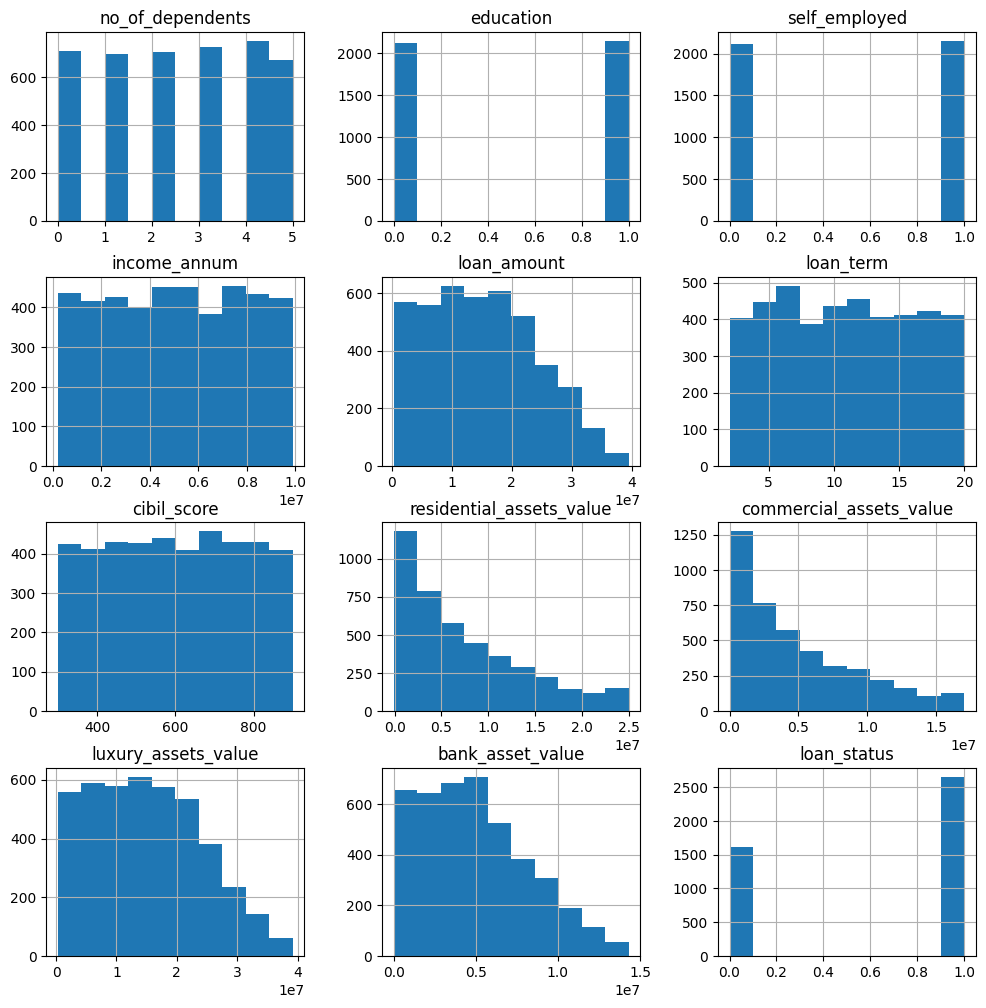

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 12))
plt.show()

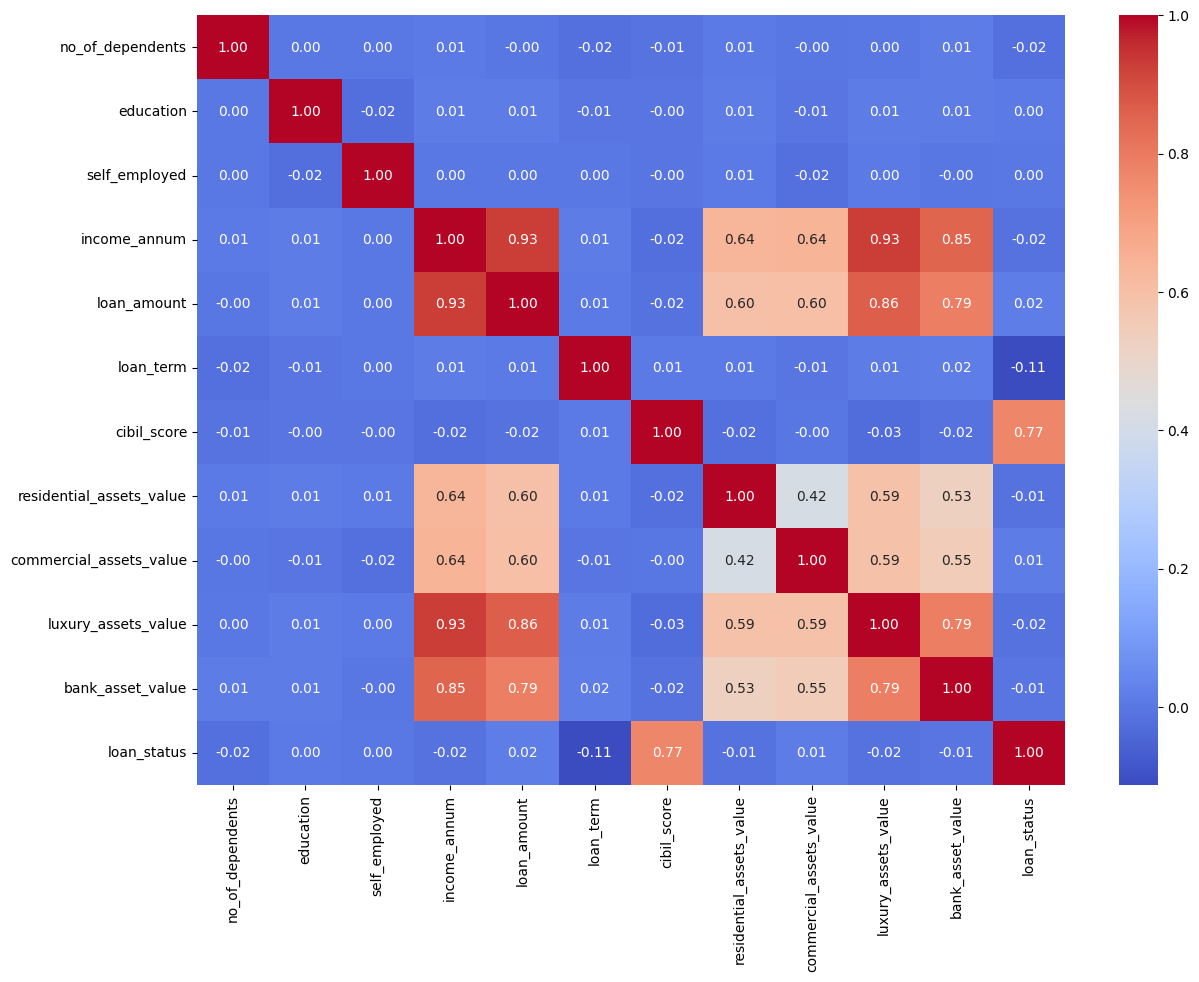

In [ ]:
plt.figure(figsize=(14,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
df['income to loan ratios'] = df['income_annum'] / df['loan_amount']
df['total_assets'] = df['bank_asset_value'] + df['luxury_assets_value'] + df['commercial_assets_value'] + df['residential_assets_value']
df['income to assets ratio'] = df['income_annum'] / df['total_assets']
df['loan to assets ratio'] = df['loan_amount'] / df['total_assets']
df['loan to credit ratio'] = df['loan_amount'] / df['cibil_score']

In [ ]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,income to loan ratios,total_assets,income to assets ratio,loan to assets ratio,loan to credit ratio
0,2,1,0,9600000,29900000,12,778,2400000.0,17050000.0,22700000,8000000.0,1,0.321070,50150000.0,0.191426,0.596211,38431.876607
1,0,0,1,4100000,12200000,8,417,2700000.0,2200000.0,8800000,3300000.0,0,0.336066,17000000.0,0.241176,0.717647,29256.594724
2,3,1,0,9100000,29700000,20,506,7100000.0,4500000.0,33300000,12800000.0,0,0.306397,57700000.0,0.157712,0.514731,58695.652174
3,3,1,0,8200000,30700000,8,467,18200000.0,3300000.0,23300000,7900000.0,0,0.267101,52700000.0,0.155598,0.582543,65738.758030
4,5,0,1,9800000,24200000,20,382,12400000.0,8200000.0,29400000,5000000.0,0,0.404959,55000000.0,0.178182,0.440000,63350.785340


# Model Selection & Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop("loan_status", axis=1)
y = df["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_pred))

R²: 0.6041462124074307
RMSE: 0.30416237209217306
MAE: 0.24463030747984585


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best R²:", grid.best_score_)


Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best R²: 0.9991300836353341
